In [17]:
# 0. importing librariees .
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [18]:
# 1. importing dataset .
dataset = pd.read_csv('data/Position_Salaries.csv')


In [19]:
# 2. spliting the data to Features and Target .
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
y = y.reshape(-1,1)

In [20]:
# 3. scalling the Data .
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [26]:
# 4. creating support vector regressor models .
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
reg = SVR(kernel='rbf')
reg.fit(X,y);

In [29]:
# 5. predicting 
y_pred = sc.inverse_transform(reg.predict(sc.transform(np.array([[6.5]]))))
y_pred

array([87714.85539438])

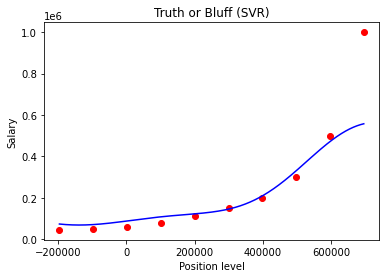

In [30]:
# 6. visualisation the SVR 
X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter( sc.inverse_transform(X) , sc.inverse_transform(y) , color = 'red')
plt.plot(X_grid, sc.inverse_transform(reg.predict(sc.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()